<a href="https://colab.research.google.com/github/phatnguyenthuan1502/Remaining-Useful-Life-Assessment-of-Bypass-and-Blocking-Diodes-in-Photovoltaic-Arrays/blob/main/WT_CNN_GRU_time_series_analysis_(data_2_1)(split_0)(WT_use_cA_and_cD)(WT_1_level)(2_CNN_model)(CNN_uses_LeakyReLU)(1_fully_connected_layers)(find_LC_from_temp_and_Nf).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install openpyxl

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
import pandas as pd
book = pd.ExcelFile('Data for ML TT-DB2-1.xlsx')
sheet = pd.read_excel(book, 'Sheet1')

temp = sheet.loc[:,"Temperature"]
cur = sheet.loc[:,"Current (A)"]
nf = sheet.loc[:,"Nf1"]
lc = sheet.loc[:,"LC1"]


print(pd.Series(temp).array)
print(pd.Series(cur).array)
print(pd.Series(nf).array)
print(pd.Series(lc).array)

<PandasArray>
["TT 41'", "TT 44'", "TT 47'", "TT 50'", "TT 53'", "TT 56'", "TT 59'",
 "TT 62'", "TT 65'", "TT 68'",
 ...
 "TT 47'", "TT 50'", "TT 38'", "TT 40'", "TT 43'", "TT 46'", "TT 49'",
 "TT 52'", "TT 54'", "TT 57'"]
Length: 485, dtype: object
<PandasArray>
[0.39210526315789473,  0.7242105263157894,  1.0563157894736843,
   1.388421052631579,  1.7205263157894737,  2.0526315789473686,
   2.384736842105263,   2.716842105263158,   3.048947368421053,
  3.3810526315789473,
 ...
  1.0050000000000001,                1.28,                0.42,
  0.6257142857142857,  0.8314285714285714,  1.0371428571428571,
  1.2428571428571429,  1.4485714285714286,  1.6542857142857144,
                1.86]
Length: 485, dtype: float64
<PandasArray>
[82629155.38, 12175012.53, 3903707.065, 1649331.863, 1293050.762, 477050.6499,
 293488.9822, 224573.3774, 130915.5197, 156000.6289,
 ...
 7245024.471, 1917585.214, 95679850.21, 19391478.89, 9006561.573, 6611693.205,
 3241121.595, 1996905.032, 825555.4903, 59278

In [5]:
temp = pd.Series(temp).array
cur = pd.Series(cur).array
nf = pd.Series(nf).array
lc = pd.Series(lc).array

print(temp)
print(cur)
print(nf)
print(lc)

<PandasArray>
["TT 41'", "TT 44'", "TT 47'", "TT 50'", "TT 53'", "TT 56'", "TT 59'",
 "TT 62'", "TT 65'", "TT 68'",
 ...
 "TT 47'", "TT 50'", "TT 38'", "TT 40'", "TT 43'", "TT 46'", "TT 49'",
 "TT 52'", "TT 54'", "TT 57'"]
Length: 485, dtype: object
<PandasArray>
[0.39210526315789473,  0.7242105263157894,  1.0563157894736843,
   1.388421052631579,  1.7205263157894737,  2.0526315789473686,
   2.384736842105263,   2.716842105263158,   3.048947368421053,
  3.3810526315789473,
 ...
  1.0050000000000001,                1.28,                0.42,
  0.6257142857142857,  0.8314285714285714,  1.0371428571428571,
  1.2428571428571429,  1.4485714285714286,  1.6542857142857144,
                1.86]
Length: 485, dtype: float64
<PandasArray>
[82629155.38, 12175012.53, 3903707.065, 1649331.863, 1293050.762, 477050.6499,
 293488.9822, 224573.3774, 130915.5197, 156000.6289,
 ...
 7245024.471, 1917585.214, 95679850.21, 19391478.89, 9006561.573, 6611693.205,
 3241121.595, 1996905.032, 825555.4903, 59278

In [6]:
temp_new = []
for str_temp in temp:
  str_new = str_temp.replace("TT ","")
  str_new = str_new.replace("'","")
  temp_new.append(int(str_new))

In [7]:
temp_new

[41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 108,
 111,
 114,
 117,
 120,
 38,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 38,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 77,
 80,
 83,
 86,
 89,
 92,
 95,
 98,
 101,
 104,
 107,
 110,
 113,
 116,
 119,
 122,
 125,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 90,
 93,
 96,
 99,
 102,
 105,
 108,
 111,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 65,
 68,
 71,
 74,
 41,
 44,
 47,
 50,
 53,
 56,
 59,
 62,
 39,
 42,
 45,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 75,
 78,
 81,
 84,
 87,
 40,
 43,
 46,
 49,
 52,
 55,
 58,
 61,
 64,
 67,
 70,
 73,
 76,
 79,
 42,
 48,
 51,
 54,
 57,
 60,
 63,
 66,
 69,
 72,
 39,
 42,


In [8]:
nf = nf/1000

print(nf)

<PandasArray>
[       82629.15538,        12175.01253,        3903.707065,
 1649.3318629999999,        1293.050762,        477.0506499,
        293.4889822,        224.5733774,        130.9155197,
        156.0006289,
 ...
        7245.024471,        1917.585214,  95679.85020999999,
 19391.478890000002,        9006.561573, 6611.6932050000005,
        3241.121595,        1996.905032,        825.5554903,
        592.7808249]
Length: 485, dtype: float64


In [9]:
lc = lc*1000000

print(lc)

<PandasArray>
[             0.0182,               0.123,               0.384,
               0.909,                3.48,                3.14,
                5.11,                11.1,                11.5,
  41.699999999999996,
 ...
               0.897,               0.782,             0.00523,
              0.0258, 0.27799999999999997,               0.983,
  1.3900000000000001,                2.25,               0.606,
                2.53]
Length: 485, dtype: float64


In [12]:
temp_new = np.array(temp_new)
cur = np.array(cur)
nf = np.array(nf)
lc = np.array(lc)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from numpy import array
from keras.layers import Flatten
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
import tensorflow as tf
import pywt

In [14]:
def get_wave(data, wavelet, num_level, mode):
  return pywt.wavedec(data, wavelet, level = num_level, mode = mode)

In [15]:
wavelet = 'db1'
mode = 'periodic'
num_level = 1

In [16]:
a = [1,2,3,4,5,6,7,8,9]
get_wave(a, wavelet, num_level, mode)

[array([ 2.12132034,  4.94974747,  7.77817459, 10.60660172,  7.07106781]),
 array([-0.70710678, -0.70710678, -0.70710678, -0.70710678,  5.65685425])]

In [17]:
a = [1,2]
get_wave(a, wavelet, num_level, mode)

[array([2.12132034]), array([-0.70710678])]

In [18]:
a = [3,4]
get_wave(a, wavelet, num_level, mode)

[array([4.94974747]), array([-0.70710678])]

In [19]:
a = [5,6]
get_wave(a, wavelet, num_level, mode)

[array([7.77817459]), array([-0.70710678])]

In [20]:
a = [7,8]
get_wave(a, wavelet, num_level, mode)

[array([10.60660172]), array([-0.70710678])]

In [21]:
a = [9,1]
get_wave(a, wavelet, num_level, mode)

[array([7.07106781]), array([5.65685425])]

In [22]:
# multivariate data preparation
from numpy import array
from numpy import hstack

# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [23]:
# define input sequence
in_seq1 = temp_new
in_seq2 = cur
in_seq3 = nf
out_seq = lc
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq2.reshape((len(in_seq3), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, in_seq3, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X, y = split_sequences(dataset, n_steps)
print(X.shape, y.shape)
# summarize the data
for i in range(len(X)):
	print(X[i], y[i])

(485, 1, 3) (485,)
[[41.          0.39210526  0.39210526]] 0.0182
[[44.          0.72421053  0.72421053]] 0.123
[[47.          1.05631579  1.05631579]] 0.384
[[50.          1.38842105  1.38842105]] 0.909
[[53.          1.72052632  1.72052632]] 3.48
[[56.          2.05263158  2.05263158]] 3.14
[[59.          2.38473684  2.38473684]] 5.11
[[62.          2.71684211  2.71684211]] 11.1
[[65.          3.04894737  3.04894737]] 11.5
[[68.          3.38105263  3.38105263]] 41.699999999999996
[[71.          3.71315789  3.71315789]] 52.0
[[74.          4.04526316  4.04526316]] 76.4
[[77.          4.37736842  4.37736842]] 89.6
[[80.          4.70947368  4.70947368]] 130.78199999999998
[[83.          5.04157895  5.04157895]] 175.756
[[86.          5.37368421  5.37368421]] 234.88
[[89.          5.70578947  5.70578947]] 249.045
[[92.          6.03789474  6.03789474]] 353.42
[[40.    0.05  0.05]] 0.00013
[[43.          0.38384615  0.38384615]] 0.051300000000000005
[[46.          0.71769231  0.71769231

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, shuffle=False)

In [25]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, shuffle=False)

In [26]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

348
348
88
88
49
49


In [27]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_val = np.array(X_val)
y_val = np.array(y_val)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [28]:
X_train = X_train.astype(np.float32)
y_train = y_train.astype(np.float32)
X_val = X_val.astype(np.float32)
y_val = y_val.astype(np.float32)
X_test = X_test.astype(np.float32)
y_test = y_test.astype(np.float32)

In [29]:
for i in range(len(X_train)):
	print(X_train[i], y_train[i])

[[41.          0.39210525  0.39210525]] 0.0182
[[44.         0.7242105  0.7242105]] 0.123
[[47.         1.0563158  1.0563158]] 0.384
[[50.        1.388421  1.388421]] 0.909
[[53.         1.7205263  1.7205263]] 3.48
[[56.         2.0526316  2.0526316]] 3.14
[[59.         2.3847368  2.3847368]] 5.11
[[62.         2.7168422  2.7168422]] 11.1
[[65.         3.0489473  3.0489473]] 11.5
[[68.         3.3810527  3.3810527]] 41.7
[[71.        3.713158  3.713158]] 52.0
[[74.         4.0452633  4.0452633]] 76.4
[[77.         4.3773685  4.3773685]] 89.6
[[80.         4.7094736  4.7094736]] 130.782
[[83.        5.041579  5.041579]] 175.756
[[86.         5.3736844  5.3736844]] 234.88
[[89.         5.7057896  5.7057896]] 249.045
[[92.         6.0378947  6.0378947]] 353.42
[[40.    0.05  0.05]] 0.00013
[[43.          0.38384616  0.38384616]] 0.0513
[[46.         0.7176923  0.7176923]] 0.319
[[49.         1.0515385  1.0515385]] 0.728
[[52.         1.3853846  1.3853846]] 2.01
[[55.         1.7192308  1.

In [30]:
for i in range(len(X_val)):
	print(X_val[i], y_val[i])

[[71.         2.7758822  2.7758822]] 29.8
[[74.        2.954706  2.954706]] 32.6
[[77.         3.1335294  3.1335294]] 43.0
[[80.        3.312353  3.312353]] 59.0
[[83.         3.4911764  3.4911764]] 63.0
[[86.    3.67  3.67]] 57.4
[[3.6e+01 2.0e-02 2.0e-02]] 2.03e-06
[[39.          0.27347827  0.27347827]] 0.019
[[42.         0.5269565  0.5269565]] 0.19
[[45.         0.7804348  0.7804348]] 0.733
[[48.        1.033913  1.033913]] 1.56
[[51.         1.2873913  1.2873913]] 3.84
[[54.         1.5408696  1.5408696]] 7.17
[[57.         1.7943479  1.7943479]] 12.8
[[60.        2.047826  2.047826]] 20.7
[[63.         2.3013043  2.3013043]] 29.3
[[66.         2.5547826  2.5547826]] 33.6
[[69.        2.808261  2.808261]] 41.9
[[72.         3.0617392  3.0617392]] 57.8
[[75.         3.3152175  3.3152175]] 73.1
[[78.         3.5686955  3.5686955]] 100.495
[[81.         3.8221738  3.8221738]] 123.708
[[84.        4.075652  4.075652]] 158.998
[[87.         4.3291306  4.3291306]] 189.882
[[90.        

In [37]:
train_temp_wave = np.array(get_wave(X_train.T[0][0], wavelet, num_level, mode))
train_cur_wave = np.array(get_wave(X_train.T[1][0], wavelet, num_level, mode))
train_nf_wave = np.array(get_wave(X_train.T[2][0], wavelet, num_level, mode))
train_lc_wave = np.array(get_wave(y_train, wavelet, num_level, mode))
val_temp_wave = np.array(get_wave(X_val.T[0][0], wavelet, num_level, mode))
val_cur_wave = np.array(get_wave(X_val.T[1][0], wavelet, num_level, mode))
val_nf_wave = np.array(get_wave(X_val.T[2][0], wavelet, num_level, mode))
val_lc_wave = np.array(get_wave(y_val, wavelet, num_level, mode))
test_temp_wave = np.array(get_wave(X_test.T[0][0], wavelet, num_level, mode))
test_cur_wave = np.array(get_wave(X_test.T[1][0], wavelet, num_level, mode))
test_nf_wave = np.array(get_wave(X_test.T[2][0], wavelet, num_level, mode))
test_lc_wave = np.array(get_wave(y_test, wavelet, num_level, mode))

In [38]:
train_temp_wave_new = np.concatenate((train_temp_wave[0], train_temp_wave[1]))
train_cur_wave_new = np.concatenate((train_cur_wave[0], train_cur_wave[1]))
train_nf_wave_new = np.concatenate((train_nf_wave[0], train_nf_wave[1]))
train_lc_wave_new = np.concatenate((train_lc_wave[0], train_lc_wave[1]))
val_temp_wave_new = np.concatenate((val_temp_wave[0], val_temp_wave[1]))
val_cur_wave_new = np.concatenate((val_cur_wave[0], val_cur_wave[1]))
val_nf_wave_new = np.concatenate((val_nf_wave[0], val_nf_wave[1]))
val_lc_wave_new = np.concatenate((val_lc_wave[0], val_lc_wave[1]))
test_temp_wave_new = np.concatenate((test_temp_wave[0], test_temp_wave[1]))
test_cur_wave_new = np.concatenate((test_cur_wave[0], test_cur_wave[1]))
test_nf_wave_new = np.concatenate((test_nf_wave[0], test_nf_wave[1]))
test_lc_wave_new = np.concatenate((test_lc_wave[0], test_lc_wave[1]))

In [39]:
hstack((train_temp_wave_new, train_cur_wave_new, train_nf_wave_new, train_lc_wave_new))

array([60.104073  , 68.589355  , 77.07464   , ...,  0.71559197,
       -2.503158  , -5.232589  ], dtype=float32)

In [40]:
#TRAIN_SET
# define input sequence
in_seq1 = train_temp_wave_new
in_seq2 = train_cur_wave_new
in_seq3 = train_nf_wave_new
out_seq = train_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq2.reshape((len(in_seq3), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_train = hstack((in_seq1, in_seq2, in_seq3, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_train_wave, y_train_wave = split_sequences(dataset_train, n_steps)
print(X_train_wave.shape, y_train_wave.shape)
# summarize the data
for i in range(len(X_train_wave)):
	print(X_train_wave[i], y_train_wave[i])

(348, 1, 3) (348,)
[[60.104073    0.78935444  0.78935444]] 0.09984348
[[68.589355   1.7286899  1.7286899]] 0.914289
[[77.07464    2.6680255  2.6680255]] 4.6810465
[[85.55992   3.607361  3.607361]] 11.462201
[[94.0452     4.5466967  4.5466967]] 37.61808
[[102.53049     5.4860325   5.4860325]] 90.79251
[[111.01576     6.4253674   6.4253674]] 155.8336
[[119.501045   7.364703   7.364703]] 290.3635
[[127.98633    8.304039   8.304039]] 426.00708
[[58.689865    0.30677554  0.30677554]] 0.036366504
[[67.17514   1.251035  1.251035]] 0.74034077
[[75.66042    2.1952946  2.1952946]] 3.8395896
[[84.145706  3.139554  3.139554]] 14.17042
[[92.63098    4.0838137  4.0838137]] 30.971277
[[101.11627     5.0280733   5.0280733]] 58.831284
[[109.60155     5.9723325   5.9723325]] 92.206726
[[57.27565     0.23046443  0.23046443]] 0.020813052
[[65.760925  0.926048  0.926048]] 0.67952955
[[74.246216   1.6216315  1.6216315]] 3.556747
[[82.73149   2.317215  2.317215]] 11.992531
[[91.216774   3.0127985  3.0127985]

In [41]:
#VAL_SET
# define input sequence
in_seq1 = val_temp_wave_new
in_seq2 = val_cur_wave_new
in_seq3 = val_nf_wave_new
out_seq = val_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_val = hstack((in_seq1, in_seq2, in_seq3, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_val_wave, y_val_wave = split_sequences(dataset_val, n_steps)
print(X_val_wave.shape, y_val_wave.shape)
# summarize the data
for i in range(len(X_val_wave)):
	print(X_val_wave[i], y_val_wave[i])

(88, 1, 3) (88,)
[[102.53049     4.0521374   4.0521374]] 44.12346
[[111.01576    4.557927   4.557927]] 72.12489
[[119.501045   5.063716   5.063716]] 85.13565
[[53.033005    0.20752047  0.20752047]] 0.013436464
[[61.518288    0.92446524  0.92446524]] 0.65265954
[[70.00357  1.64141  1.64141]] 3.8183763
[[78.488846   2.3583548  2.3583548]] 14.120923
[[86.97414    3.0752995  3.0752995]] 35.35534
[[95.45941    3.7922444  3.7922444]] 53.386562
[[103.944695    4.5091896   4.5091896]] 92.56027
[[112.42998     5.2261333   5.2261333]] 158.53546
[[120.91525    5.943079   5.943079]] 246.6954
[[129.40054    6.660023   6.660023]] 277.70984
[[137.88582     7.3769684   7.3769684]] 355.00436
[[146.3711     8.093913   8.093913]] 459.997
[[55.861435    0.28233764  0.28233764]] 0.028698634
[[64.34671    0.9591398  0.9591398]] 0.9192388
[[72.832     1.635942  1.635942]] 4.6810465
[[81.317276   2.3127441  2.3127441]] 15.139156
[[89.80256    2.9895465  2.9895465]] 39.315136
[[98.28784   3.666349  3.666349]] 

In [42]:
#TEST_SET
# define input sequence
in_seq1 = test_temp_wave_new
in_seq2 = test_cur_wave_new
in_seq3 = test_nf_wave_new
out_seq = test_lc_wave_new
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
in_seq3 = in_seq3.reshape((len(in_seq3), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset_test = hstack((in_seq1, in_seq2, in_seq3, out_seq))
# choose a number of time steps
n_steps = 1
# convert into input/output
X_test_wave, y_test_wave = split_sequences(dataset_test, n_steps)
print(X_test_wave.shape, y_test_wave.shape)
# summarize the data
for i in range(len(X_test_wave)):
	print(X_test_wave[i], y_test_wave[i])

(50, 1, 3) (50,)
[[67.17514    2.5548651  2.5548651]] 13.647161
[[75.66042    3.1258538  3.1258538]] 35.850315
[[84.145706   3.6968424  3.6968424]] 60.316208
[[92.63098    4.2678313  4.2678313]] 100.55058
[[101.11627     4.8388205   4.8388205]] 155.74945
[[109.60155    5.409809   5.409809]] 238.48166
[[118.08683    5.980798   5.980798]] 198.95935
[[57.27565    1.2715065  1.2715065]] 0.7177133
[[65.760925   2.2691698  2.2691698]] 8.004448
[[74.246216   3.2668333  3.2668333]] 30.40559
[[82.73149   4.264497  4.264497]] 72.33703
[[91.216774   5.2621603  5.2621603]] 157.12265
[[99.70206    6.2598233  6.2598233]] 308.5736
[[108.18733     7.2574863   7.2574863]] 520.1202
[[116.67262   8.25515   8.25515]] 687.65356
[[125.1579     9.252813   9.252813]] 957.44446
[[133.64319   10.250477  10.250477]] 1028.6127
[[142.12846  11.24814  11.24814]] 766.882
[[55.861435    0.44901282  0.44901282]] 0.0403758
[[64.34671    1.2268302  1.2268302]] 0.7983235
[[62.225395   1.2020814  1.2020814]] 0.55665565
[[

In [43]:
def get_cA(wave, num_level):
  return(wave[:len(wave)//(2*num_level)])

def get_cD(wave, level, num_level):
  i = 0
  temp_wave = wave
  while(i<level):
    cD = temp_wave[len(temp_wave)//2:]
    temp_wave = temp_wave[:len(temp_wave)//2]
    i = i + 1
  return cD

In [44]:
get_cA(X_train_wave, num_level)

array([[[ 60.104073  ,   0.78935444,   0.78935444]],

       [[ 68.589355  ,   1.7286899 ,   1.7286899 ]],

       [[ 77.07464   ,   2.6680255 ,   2.6680255 ]],

       [[ 85.55992   ,   3.607361  ,   3.607361  ]],

       [[ 94.0452    ,   4.5466967 ,   4.5466967 ]],

       [[102.53049   ,   5.4860325 ,   5.4860325 ]],

       [[111.01576   ,   6.4253674 ,   6.4253674 ]],

       [[119.501045  ,   7.364703  ,   7.364703  ]],

       [[127.98633   ,   8.304039  ,   8.304039  ]],

       [[ 58.689865  ,   0.30677554,   0.30677554]],

       [[ 67.17514   ,   1.251035  ,   1.251035  ]],

       [[ 75.66042   ,   2.1952946 ,   2.1952946 ]],

       [[ 84.145706  ,   3.139554  ,   3.139554  ]],

       [[ 92.63098   ,   4.0838137 ,   4.0838137 ]],

       [[101.11627   ,   5.0280733 ,   5.0280733 ]],

       [[109.60155   ,   5.9723325 ,   5.9723325 ]],

       [[ 57.27565   ,   0.23046443,   0.23046443]],

       [[ 65.760925  ,   0.926048  ,   0.926048  ]],

       [[ 74.246216  ,   1.6

In [ ]:
get_cD(X_train_wave, 1, num_level)

array([[[ -2.1213188 ,  13.234627  ]],

       [[ -2.1213188 , -11.634903  ]],

       [[ -2.1213188 , -19.689053  ]],

       [[ -2.1213188 ,   3.733677  ]],

       [[ -2.1213226 ,   5.856205  ]],

       [[ -2.1213226 ,   0.9759674 ]],

       [[ -2.1213188 ,   2.9887695 ]],

       [[ -2.1213188 ,  -5.92865   ]],

       [[ -2.1213188 ,   1.5762482 ]],

       [[ -2.121315  ,  14.740503  ]],

       [[ -2.1213207 ,   4.4410133 ]],

       [[ -2.1213188 ,   1.5333176 ]],

       [[ -2.1213226 ,   0.8738251 ]],

       [[ -2.1213226 ,   6.3178253 ]],

       [[ -2.1213188 ,   0.6503105 ]],

       [[ -2.1213188 ,   6.721609  ]],

       [[ -2.1213188 ,   4.0081406 ]],

       [[ -2.1213207 , -16.6726    ]],

       [[ -2.1213188 ,  18.554008  ]],

       [[ -2.1213188 ,   1.5540237 ]],

       [[ -2.1213226 ,   4.526787  ]],

       [[ -2.1213226 ,   1.4418106 ]],

       [[ -2.1213188 ,   6.7145386 ]],

       [[ -2.1213188 ,  -3.8069    ]],

       [[ -2.1213188 ,  -0.59310913]],



In [45]:
from keras import backend as K
def rmspe(y_true, y_pred):
    return K.sqrt(K.mean(K.square((y_true - y_pred) / y_true)))

In [46]:
X_train_wave.shape

(348, 1, 3)

In [47]:
# the dataset knows the number of features, e.g. 2
n_features = X_train_wave.shape[2]
# steps
n_steps = 1
# define model
model_cA = Sequential()
model_cA.add(Conv1D(filters=64, kernel_size=1, activation=tf.keras.layers.LeakyReLU(), input_shape=(n_steps, n_features)))
model_cA.add(MaxPooling1D(pool_size=1))
#model_cA.add(LSTM(4,return_sequences=True))
model_cA.add(GRU(50, input_shape=(1, n_features)))
model_cA.add(Flatten())
model_cA.add(Dense(40, activation='relu'))
model_cA.add(Dense(2))
model_cA.add(Dense(1))
model_cA.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape'])

In [48]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [49]:
# fit model
history_cA = model_cA.fit(get_cA(X_train_wave, num_level), get_cA(y_train_wave, num_level), epochs=2000, verbose=2, callbacks=[csv_logger], validation_data=(get_cA(X_val_wave, num_level), get_cA(y_val_wave, num_level)))

Epoch 1/2000
6/6 - 4s - loss: 96554.3203 - mse: 96554.3203 - mae: 136.8264 - rmse: 310.7319 - rmspe: 8.4588 - mape: 318.7174 - val_loss: 87840.4453 - val_mse: 87840.4453 - val_mae: 160.5389 - val_rmse: 296.3789 - val_rmspe: 12.5145 - val_mape: 481.8061 - 4s/epoch - 723ms/step
Epoch 2/2000
6/6 - 0s - loss: 96235.3359 - mse: 96235.3359 - mae: 136.0966 - rmse: 310.2182 - rmspe: 21.8960 - mape: 706.6963 - val_loss: 87594.0312 - val_mse: 87594.0312 - val_mae: 159.9929 - val_rmse: 295.9629 - val_rmspe: 19.5677 - val_mape: 711.9169 - 82ms/epoch - 14ms/step
Epoch 3/2000
6/6 - 0s - loss: 96042.0859 - mse: 96042.0859 - mae: 135.7058 - rmse: 309.9066 - rmspe: 41.1977 - mape: 1025.5729 - val_loss: 87325.5078 - val_mse: 87325.5078 - val_mae: 159.4142 - val_rmse: 295.5089 - val_rmspe: 26.4352 - val_mape: 935.6096 - 82ms/epoch - 14ms/step
Epoch 4/2000
6/6 - 0s - loss: 95770.5547 - mse: 95770.5547 - mae: 135.2777 - rmse: 309.4682 - rmspe: 46.9692 - mape: 1377.3541 - val_loss: 87001.3047 - val_mse: 870

In [50]:
# the dataset knows the number of features, e.g. 2
n_features = X_train_wave.shape[2]
# steps
n_steps = 1
# define model
model_cD = Sequential()
model_cD.add(Conv1D(filters=64, kernel_size=1, activation=tf.keras.layers.LeakyReLU(), input_shape=(n_steps, n_features)))
model_cD.add(MaxPooling1D(pool_size=1))
#model_cD.add(LSTM(4,return_sequences=True))
model_cD.add(GRU(50, input_shape=(1, n_features)))
model_cD.add(Flatten())
model_cD.add(Dense(40, activation='relu'))
model_cD.add(Dense(2))
model_cD.add(Dense(1))
model_cD.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae', tf.keras.metrics.RootMeanSquaredError(name='rmse'), rmspe, 'mape'])

In [51]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('log.csv', append=True, separator=';')

In [52]:
# fit model
history_cD = model_cD.fit(get_cD(X_train_wave, 1, num_level), get_cD(y_train_wave, 1, num_level), epochs=2000, verbose=2, callbacks=[csv_logger], validation_data=(get_cD(X_val_wave, 1, num_level), get_cD(y_val_wave, 1, num_level)))

Epoch 1/2000
6/6 - 5s - loss: 3669.5615 - mse: 3669.5615 - mae: 21.8302 - rmse: 60.5769 - rmspe: 2.0778 - mape: 129.9984 - val_loss: 2555.9783 - val_mse: 2555.9783 - val_mae: 21.9090 - val_rmse: 50.5567 - val_rmspe: 2.3905 - val_mape: 150.4410 - 5s/epoch - 885ms/step
Epoch 2/2000
6/6 - 0s - loss: 3627.9224 - mse: 3627.9224 - mae: 21.5768 - rmse: 60.2322 - rmspe: 5.8788 - mape: 209.6265 - val_loss: 2529.6743 - val_mse: 2529.6743 - val_mae: 21.7144 - val_rmse: 50.2959 - val_rmspe: 4.0325 - val_mape: 201.2338 - 57ms/epoch - 10ms/step
Epoch 3/2000
6/6 - 0s - loss: 3594.5566 - mse: 3594.5566 - mae: 21.3947 - rmse: 59.9546 - rmspe: 8.2765 - mape: 305.7415 - val_loss: 2503.1465 - val_mse: 2503.1465 - val_mae: 21.5001 - val_rmse: 50.0315 - val_rmspe: 6.5761 - val_mape: 281.5057 - 81ms/epoch - 13ms/step
Epoch 4/2000
6/6 - 0s - loss: 3575.4155 - mse: 3575.4155 - mae: 21.2506 - rmse: 59.7948 - rmspe: 15.1031 - mape: 456.2656 - val_loss: 2479.8352 - val_mse: 2479.8352 - val_mae: 21.3008 - val_rmse

In [53]:
import matplotlib.pyplot as plt
import math

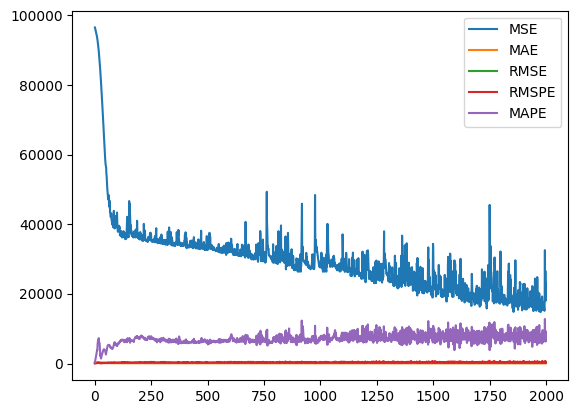

In [54]:
plt.plot(history_cA.history['mse'])
plt.plot(history_cA.history['mae'])
plt.plot(history_cA.history['rmse'])
plt.plot(history_cA.history['rmspe'])
plt.plot(history_cA.history['mape'])
plt.legend(['MSE', 'MAE', 'RMSE', "RMSPE", "MAPE"])
plt.show()

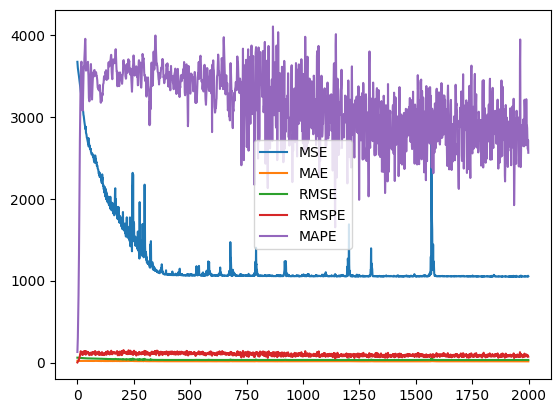

In [55]:
plt.plot(history_cD.history['mse'])
plt.plot(history_cD.history['mae'])
plt.plot(history_cD.history['rmse'])
plt.plot(history_cD.history['rmspe'])
plt.plot(history_cD.history['mape'])
plt.legend(['MSE', 'MAE', 'RMSE', "RMSPE", "MAPE"])
plt.show()

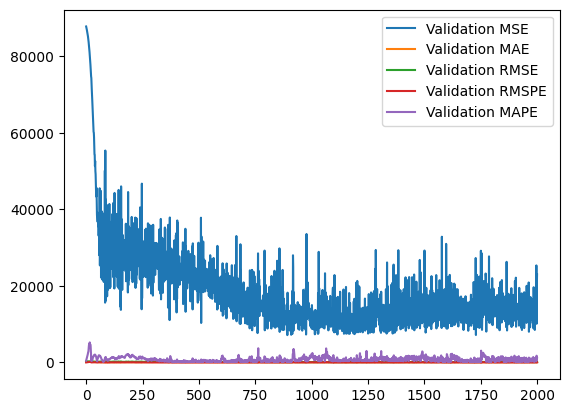

In [56]:
plt.plot(history_cA.history['val_mse'])
plt.plot(history_cA.history['val_mae'])
plt.plot(history_cA.history['val_rmse'])
plt.plot(history_cA.history['val_rmspe'])
plt.plot(history_cA.history['val_mape'])
plt.legend(['Validation MSE', 'Validation MAE', 'Validation RMSE', 'Validation RMSPE', 'Validation MAPE'])
plt.show()

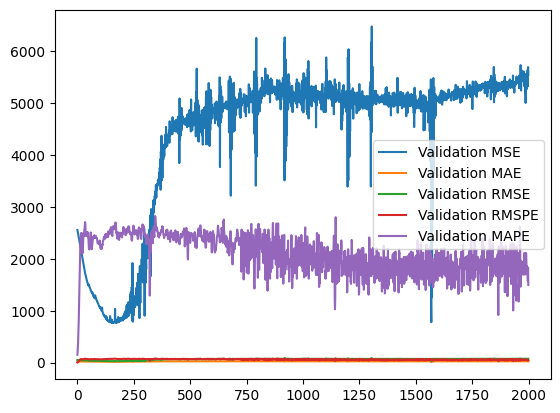

In [57]:
plt.plot(history_cD.history['val_mse'])
plt.plot(history_cD.history['val_mae'])
plt.plot(history_cD.history['val_rmse'])
plt.plot(history_cD.history['val_rmspe'])
plt.plot(history_cD.history['val_mape'])
plt.legend(['Validation MSE', 'Validation MAE', 'Validation RMSE', 'Validation RMSPE', 'Validation MAPE'])
plt.show()

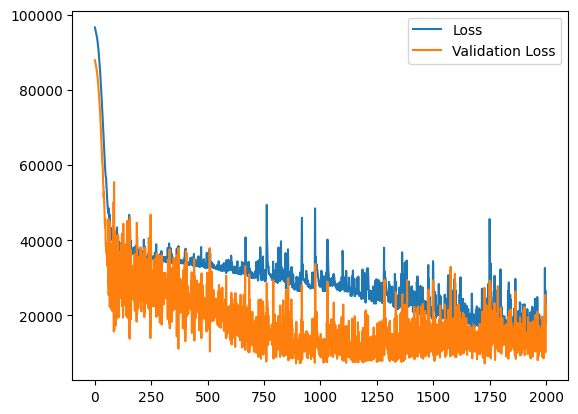

In [58]:
plt.plot(history_cA.history['loss'])
plt.plot(history_cA.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

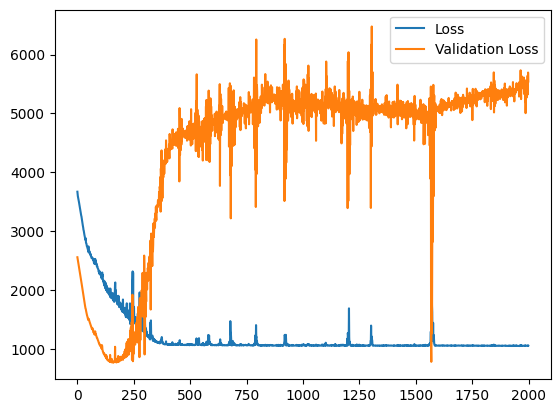

In [59]:
plt.plot(history_cD.history['loss'])
plt.plot(history_cD.history['val_loss'])
plt.legend(['Loss', 'Validation Loss'])
plt.show()

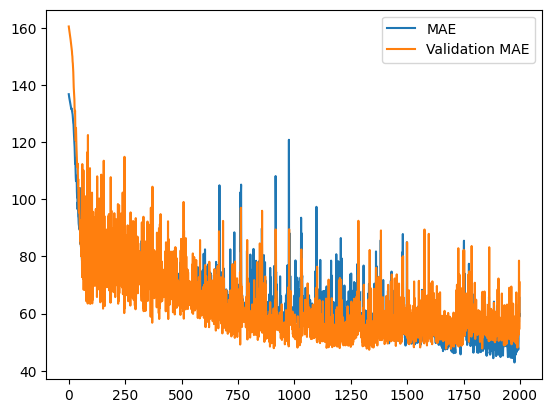

In [60]:
plt.plot(history_cA.history['mae'])
plt.plot(history_cA.history['val_mae'])
plt.legend(['MAE', 'Validation MAE'])
plt.show()

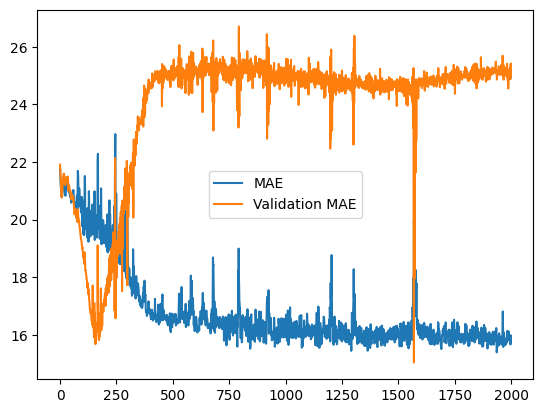

In [61]:
plt.plot(history_cD.history['mae'])
plt.plot(history_cD.history['val_mae'])
plt.legend(['MAE', 'Validation MAE'])
plt.show()

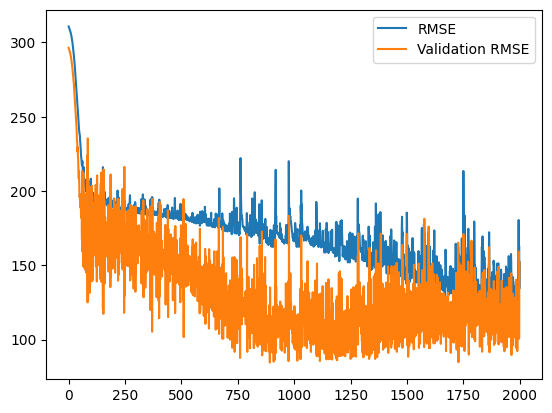

In [62]:
plt.plot(history_cA.history['rmse'])
plt.plot(history_cA.history['val_rmse'])
plt.legend(['RMSE', 'Validation RMSE'])
plt.show()

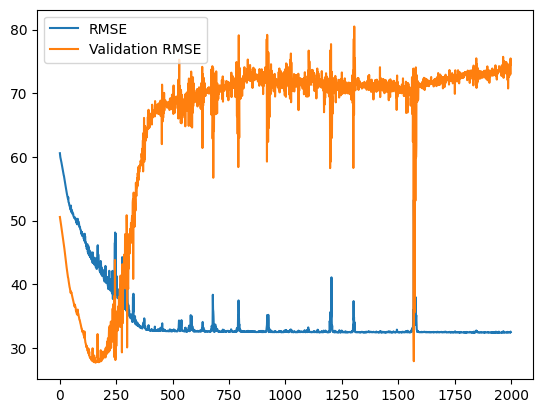

In [63]:
plt.plot(history_cD.history['rmse'])
plt.plot(history_cD.history['val_rmse'])
plt.legend(['RMSE', 'Validation RMSE'])
plt.show()

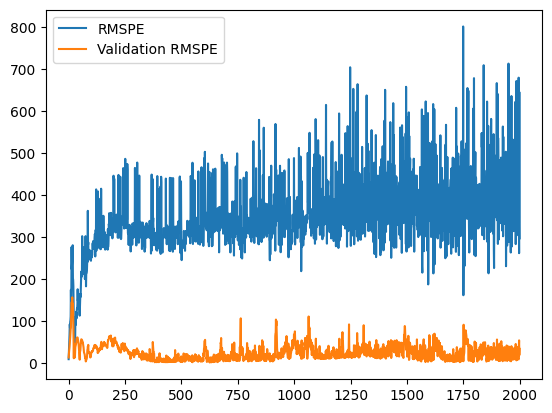

In [64]:
plt.plot(history_cA.history['rmspe'])
plt.plot(history_cA.history['val_rmspe'])
plt.legend(['RMSPE', 'Validation RMSPE'])
plt.show()

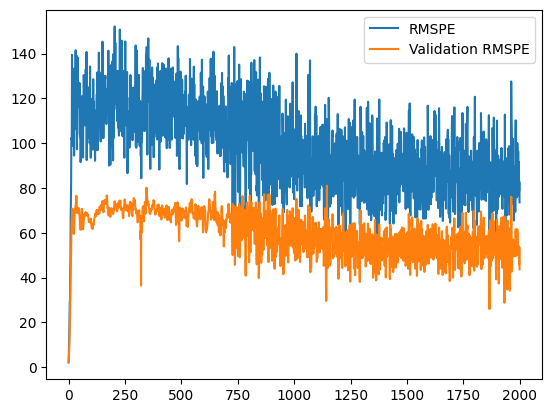

In [65]:
plt.plot(history_cD.history['rmspe'])
plt.plot(history_cD.history['val_rmspe'])
plt.legend(['RMSPE', 'Validation RMSPE'])
plt.show()

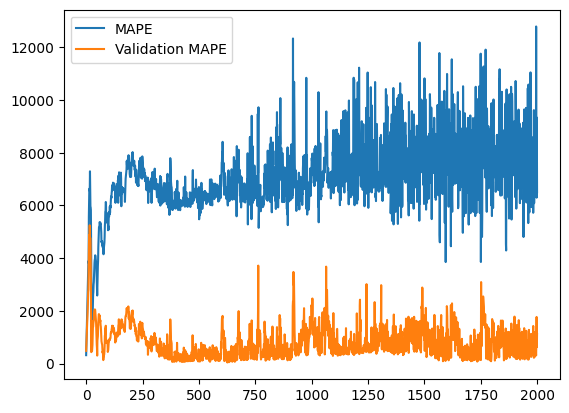

In [66]:
plt.plot(history_cA.history['mape'])
plt.plot(history_cA.history['val_mape'])
plt.legend(['MAPE', 'Validation MAPE'])
plt.show()

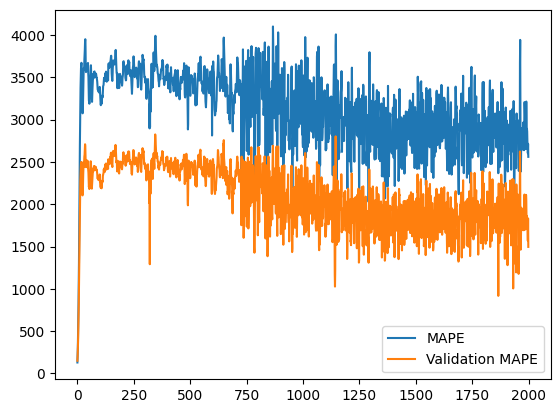

In [67]:
plt.plot(history_cD.history['mape'])
plt.plot(history_cD.history['val_mape'])
plt.legend(['MAPE', 'Validation MAPE'])
plt.show()

In [68]:
# predict all
def predict_all(model, X_test):
  preds = list()
  for x in X_test:
    x = x.reshape((1, n_steps, n_features))
    preds.extend(model.predict(x, verbose=0)[0])
  return preds

In [69]:
preds_wave_cA = predict_all(model_cA, get_cA(X_test_wave, num_level))
print(preds_wave_cA)

[-5.601176, 3.6629915, 20.43135, 43.677364, 74.63669, 132.91518, 196.68828, -7.2366495, -4.5999584, -0.6334089, 9.061405, -7.976567, -91.66419, -41.152954, 141.26945, 289.89764, 415.72748, 532.8416, -4.139488, -1.5350813, -2.8925457, -4.8495836, 0.05527842, 5.888221, 3.2708478]


In [70]:
for i in range(len(get_cA(y_test_wave, num_level))):
	print(y_test_wave[i],"; ", preds_wave_cA[i])

13.647161 ;  -5.601176
35.850315 ;  3.6629915
60.316208 ;  20.43135
100.55058 ;  43.677364
155.74945 ;  74.63669
238.48166 ;  132.91518
198.95935 ;  196.68828
0.7177133 ;  -7.2366495
8.004448 ;  -4.5999584
30.40559 ;  -0.6334089
72.33703 ;  9.061405
157.12265 ;  -7.976567
308.5736 ;  -91.66419
520.1202 ;  -41.152954
687.65356 ;  141.26945
957.44446 ;  289.89764
1028.6127 ;  415.72748
766.882 ;  532.8416
0.0403758 ;  -4.139488
0.7983235 ;  -1.5350813
0.55665565 ;  -2.8925457
0.21481904 ;  -4.8495836
1.6779643 ;  0.05527842
2.019497 ;  5.888221
7.657966 ;  3.2708478


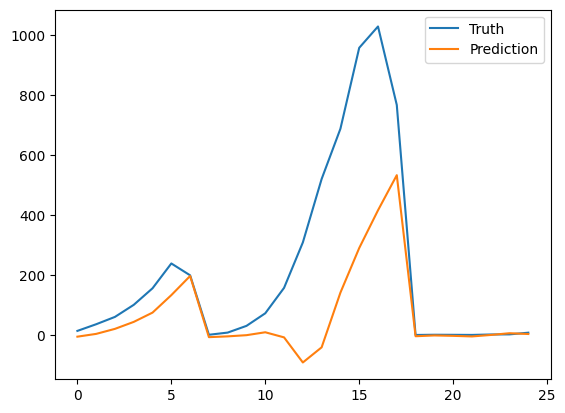

In [71]:
plt.plot(get_cA(y_test_wave, num_level))
plt.plot(preds_wave_cA)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [72]:
preds_wave_cD = predict_all(model_cD, get_cD(X_test_wave, 1, num_level))
print(preds_wave_cD)

[-2.2999926, -2.2999616, -2.2999616, -2.3000152, -2.2999926, -2.2999926, -2.2999616, -10.2506695, -10.250685, -10.250681, -10.250675, -10.250675, -10.250685, -10.250699, -10.250685, -10.250659, -10.250681, -10.25069, -6.582398, -6.5823913, -15.036182, -2.5332677, -2.5332756, -8.17762, -21.476309]


In [73]:
for i in range(len(get_cD(y_test_wave, 1, num_level))):
	print(get_cD(y_test_wave, 1, num_level)[i],"; ", preds_wave_cD[i])

-1.9091883 ;  -2.2999926
-3.8890877 ;  -2.2999616
-7.990305 ;  -2.2999616
-11.596554 ;  -2.3000152
-19.136436 ;  -2.2999926
-34.854713 ;  -2.2999926
59.376472 ;  -2.2999616
-0.5352798 ;  -10.2506695
-3.5213914 ;  -10.250685
-6.9296455 ;  -10.250681
-13.081476 ;  -10.250675
-22.913795 ;  -10.250675
-44.575302 ;  -10.250685
-84.0276 ;  -10.250699
-41.28586 ;  -10.250685
-40.45285 ;  -10.250659
128.59866 ;  -10.250681
-25.763428 ;  -10.25069
-0.035991736 ;  -6.582398
-0.47022602 ;  -6.5823913
0.5492593 ;  -15.036182
-0.17833233 ;  -2.5332677
-0.28779244 ;  -2.5332756
1.1624835 ;  -8.17762
-4.080006 ;  -21.476309


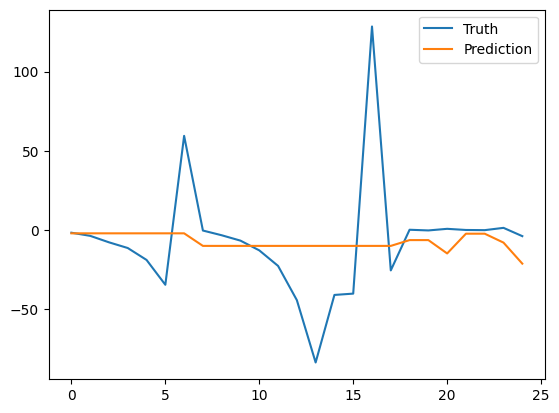

In [74]:
plt.plot(get_cD(y_test_wave, 1, num_level))
plt.plot(preds_wave_cD)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [75]:
model_cA.evaluate(get_cA(X_test_wave, num_level), get_cA(y_test_wave, num_level))

1/1 [==============================] - 0s 49ms/step - loss: 68251.2031 - mse: 68251.2031 - mae: 146.5756 - rmse: 261.2493 - rmspe: 21.4117 - mape: 658.2269


[68251.203125,
 68251.203125,
 146.5755615234375,
 261.2492980957031,
 21.41166877746582,
 658.2269287109375]

In [76]:
y_test_wave_cA_cumsum = np.cumsum(get_cA(y_test_wave, num_level))
y_test_wave_cA_cumsum

array([  13.647161,   49.497475,  109.81368 ,  210.36426 ,  366.1137  ,
        604.59534 ,  803.5547  ,  804.2724  ,  812.27686 ,  842.68243 ,
        915.0195  , 1072.1421  , 1380.7157  , 1900.8359  , 2588.4895  ,
       3545.934   , 4574.547   , 5341.4287  , 5341.469   , 5342.2676  ,
       5342.824   , 5343.039   , 5344.717   , 5346.7363  , 5354.3945  ],
      dtype=float32)

In [77]:
preds_wave_cA_cumsum = np.cumsum(preds_wave_cA)
preds_wave_cA_cumsum

array([  -5.601176 ,   -1.9381843,   18.493166 ,   62.170532 ,
        136.80722  ,  269.7224   ,  466.4107   ,  459.17404  ,
        454.5741   ,  453.94067  ,  463.00208  ,  455.0255   ,
        363.36133  ,  322.20837  ,  463.47784  ,  753.3755   ,
       1169.103    , 1701.9446   , 1697.805    , 1696.27     ,
       1693.3774   , 1688.5278   , 1688.5831   , 1694.4713   ,
       1697.7422   ], dtype=float32)

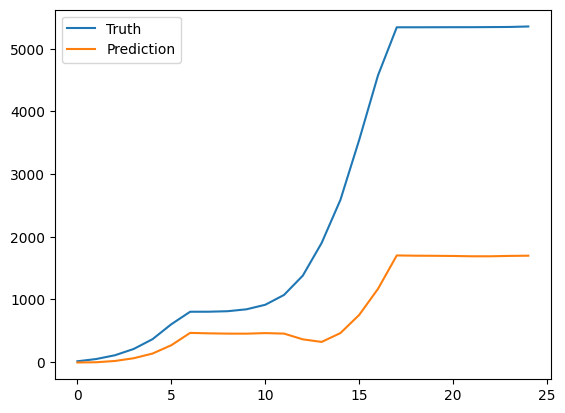

In [78]:
plt.plot(y_test_wave_cA_cumsum)
plt.plot(preds_wave_cA_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [79]:
rmspe_score_wave_cA_cumsum = rmspe(y_test_wave_cA_cumsum, preds_wave_cA_cumsum)
rmspe_score_wave_cA_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=0.72415304>

In [80]:
mape_score_wave_cA_cumsum = tf.keras.metrics.mean_absolute_percentage_error(y_test_wave_cA_cumsum, preds_wave_cA_cumsum)
mape_score_wave_cA_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=69.476456>

## Evaluate model

### Normally

In [81]:
preds_wave_whole = (np.array(preds_wave_cA), np.array(preds_wave_cD))

In [88]:
preds = (pywt.waverec(preds_wave_whole, wavelet))

In [89]:
preds

array([ -5.5869694 ,  -2.334289  ,   0.9638077 ,   4.2164445 ,
        12.820828  ,  16.073465  ,  29.258204  ,  32.510918  ,
        51.14977   ,  54.402447  ,  92.35888   ,  95.611565  ,
       137.45331   , 140.70593   , -12.365402  ,   2.1312337 ,
       -10.50099   ,   3.995667  ,  -7.6962137 ,   6.800438  ,
        -0.84094095,  13.655703  , -12.888607  ,   1.6080375 ,
       -72.0647    , -57.56804   , -36.34787   , -21.851194  ,
        92.64426   , 107.140915  , 197.74028   , 212.2369    ,
       286.7154    , 301.21204   , 369.5276    , 384.02423   ,
        -7.581518  ,   1.7273979 ,  -5.7399197 ,   3.568987  ,
       -12.677525  ,   8.586847  ,  -5.220464  ,  -1.6378827 ,
        -1.7522086 ,   1.8303841 ,  -1.6188493 ,   9.946051  ,
       -12.873205  ,  17.498882  ], dtype=float32)

In [90]:
preds = preds[:49]

In [91]:
for i in range(len(y_test)):
	print(y_test[i],"; ", preds[i])

8.3 ;  -5.5869694
11.0 ;  -2.334289
22.6 ;  0.9638077
28.1 ;  4.2164445
37.0 ;  12.820828
48.3 ;  16.073465
62.9 ;  29.258204
79.3 ;  32.510918
96.6 ;  51.14977
123.663 ;  54.402447
143.986 ;  92.35888
193.278 ;  95.611565
182.671 ;  137.45331
98.7 ;  140.70593
0.129 ;  -12.365402
0.886 ;  2.1312337
3.17 ;  -10.50099
8.15 ;  3.995667
16.6 ;  -7.6962137
26.4 ;  6.800438
41.9 ;  -0.84094095
60.4 ;  13.655703
94.9 ;  -12.888607
127.305 ;  1.6080375
186.675 ;  -72.0647
249.714 ;  -57.56804
308.364 ;  -36.34787
427.197 ;  -21.851194
457.051 ;  92.64426
515.438 ;  107.140915
648.411 ;  197.74028
705.62 ;  212.2369
818.272 ;  286.7154
636.406 ;  301.21204
524.05 ;  369.5276
560.485 ;  384.02423
0.0031 ;  -7.581518
0.054 ;  1.7273979
0.232 ;  -5.7399197
0.897 ;  3.568987
0.782 ;  -12.677525
0.00523 ;  8.586847
0.0258 ;  -5.220464
0.278 ;  -1.6378827
0.983 ;  -1.7522086
1.39 ;  1.8303841
2.25 ;  -1.6188493
0.606 ;  9.946051
2.53 ;  -12.873205


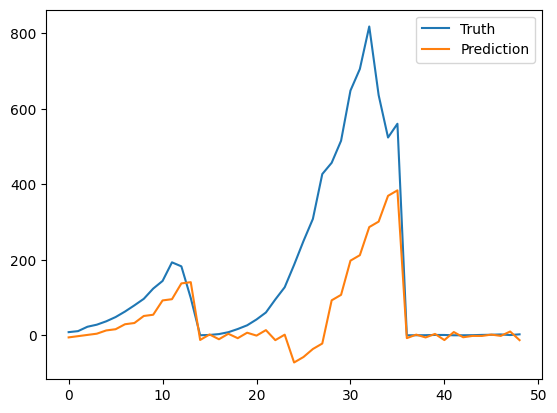

In [92]:
plt.plot(y_test)
plt.plot(preds)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [93]:
rmspe_score = rmspe(y_test, preds[:49])
rmspe_score

<tf.Tensor: shape=(), dtype=float32, numpy=422.13034>

In [94]:
mape_score = tf.keras.metrics.mean_absolute_percentage_error(y_test, preds)
mape_score

<tf.Tensor: shape=(), dtype=float32, numpy=9243.753>

In [95]:
y_test_cumsum = np.cumsum(y_test)
y_test_cumsum

array([   8.3    ,   19.3    ,   41.9    ,   70.     ,  107.     ,
        155.3    ,  218.20001,  297.5    ,  394.1    ,  517.763  ,
        661.749  ,  855.02704, 1037.698  , 1136.398  , 1136.527  ,
       1137.413  , 1140.583  , 1148.733  , 1165.333  , 1191.733  ,
       1233.633  , 1294.0331 , 1388.9331 , 1516.2382 , 1702.9132 ,
       1952.6272 , 2260.9912 , 2688.1882 , 3145.2393 , 3660.6772 ,
       4309.0884 , 5014.7085 , 5832.9805 , 6469.3867 , 6993.4365 ,
       7553.9214 , 7553.9243 , 7553.9785 , 7554.2104 , 7555.1074 ,
       7555.8896 , 7555.895  , 7555.921  , 7556.1987 , 7557.1816 ,
       7558.572  , 7560.822  , 7561.4277 , 7563.9575 ], dtype=float32)

In [96]:
preds_cumsum = np.cumsum(preds)
preds_cumsum

array([  -5.5869694,   -7.9212584,   -6.957451 ,   -2.7410064,
         10.079823 ,   26.153288 ,   55.41149  ,   87.92241  ,
        139.07217  ,  193.47462  ,  285.8335   ,  381.44507  ,
        518.8984   ,  659.6043   ,  647.2389   ,  649.3701   ,
        638.86914  ,  642.8648   ,  635.1686   ,  641.969    ,
        641.12805  ,  654.78375  ,  641.89514  ,  643.5032   ,
        571.4385   ,  513.8704   ,  477.52255  ,  455.67136  ,
        548.3156   ,  655.45654  ,  853.19684  , 1065.4337   ,
       1352.1492   , 1653.3612   , 2022.8888   , 2406.913    ,
       2399.3315   , 2401.0588   , 2395.3188   , 2398.888    ,
       2386.2104   , 2394.7974   , 2389.577    , 2387.939    ,
       2386.1868   , 2388.017    , 2386.3982   , 2396.3442   ,
       2383.471    ], dtype=float32)

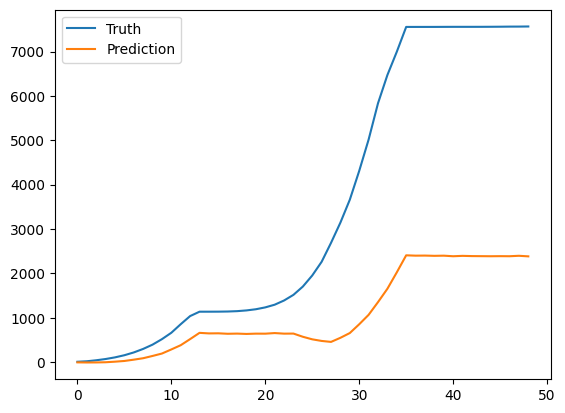

In [97]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [98]:
rmspe_score_cumsum = rmspe(y_test_cumsum, preds_cumsum)
rmspe_score_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=0.7427744>

In [99]:
mape_score_cumsum = tf.keras.metrics.mean_absolute_percentage_error(y_test_cumsum, preds_cumsum)
mape_score_cumsum

<tf.Tensor: shape=(), dtype=float32, numpy=70.576324>

### cD replaced with zeroes

In [100]:
preds_wave_whole_zero = (np.array(preds_wave_cA), np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]))

In [106]:
preds_zero = (pywt.waverec(preds_wave_whole_zero, wavelet))

In [107]:
preds_zero = preds_zero[:49]

In [108]:
preds_zero

array([-3.96062938e+00, -3.96062938e+00,  2.59012615e+00,  2.59012615e+00,
        1.44471466e+01,  1.44471466e+01,  3.08845605e+01,  3.08845605e+01,
        5.27761084e+01,  5.27761084e+01,  9.39852225e+01,  9.39852225e+01,
        1.39079615e+02,  1.39079615e+02, -5.11708394e+00, -5.11708394e+00,
       -3.25266179e+00, -3.25266179e+00, -4.47887731e-01, -4.47887731e-01,
        6.40738105e+00,  6.40738105e+00, -5.64028447e+00, -5.64028447e+00,
       -6.48163719e+01, -6.48163719e+01, -2.90995329e+01, -2.90995329e+01,
        9.98925896e+01,  9.98925896e+01,  2.04988590e+02,  2.04988590e+02,
        2.93963719e+02,  2.93963719e+02,  3.76775918e+02,  3.76775918e+02,
       -2.92706019e+00, -2.92706019e+00, -1.08546637e+00, -1.08546637e+00,
       -2.04533868e+00, -2.04533868e+00, -3.42917347e+00, -3.42917347e+00,
        3.90877460e-02,  3.90877460e-02,  4.16360085e+00,  4.16360085e+00,
        2.31283866e+00])

In [109]:
for i in range(len(y_test)):
	print(y_test[i],"; ", preds_zero[i])

8.3 ;  -3.9606293802371315
11.0 ;  -3.9606293802371315
22.6 ;  2.590126145867291
28.1 ;  2.590126145867291
37.0 ;  14.447146634432894
48.3 ;  14.447146634432894
62.9 ;  30.884560515791716
79.3 ;  30.884560515791716
96.6 ;  52.7761083744517
123.663 ;  52.7761083744517
143.986 ;  93.98522254910758
193.278 ;  93.98522254910758
182.671 ;  139.07961529388322
98.7 ;  139.07961529388322
0.129 ;  -5.117083943885606
0.886 ;  -5.117083943885606
3.17 ;  -3.2526617918165974
8.15 ;  -3.2526617918165974
16.6 ;  -0.44788773133581217
26.4 ;  -0.44788773133581217
41.9 ;  6.407381051189639
60.4 ;  6.407381051189639
94.9 ;  -5.640284468881414
127.305 ;  -5.640284468881414
186.675 ;  -64.81637189639989
249.714 ;  -64.81637189639989
308.364 ;  -29.09953291107359
427.197 ;  -29.09953291107359
457.051 ;  99.8925895739538
515.438 ;  99.8925895739538
648.411 ;  204.98858995278715
705.62 ;  204.98858995278715
818.272 ;  293.9637188387162
636.406 ;  293.9637188387162
524.05 ;  376.7759183948188
560.485 ;  376.77

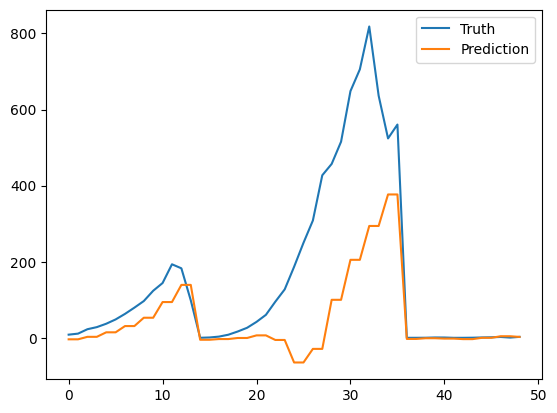

In [110]:
plt.plot(y_test)
plt.plot(preds_zero)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [111]:
rmspe_score_zero = rmspe(y_test, preds_zero)
rmspe_score_zero

<tf.Tensor: shape=(), dtype=float64, numpy=147.781352353929>

In [112]:
mape_score_zero = tf.keras.metrics.mean_absolute_percentage_error(y_test, preds_zero)
mape_score_zero

<tf.Tensor: shape=(), dtype=float64, numpy=3338.52814843176>

In [113]:
y_test_cumsum = np.cumsum(y_test)
y_test_cumsum

array([   8.3    ,   19.3    ,   41.9    ,   70.     ,  107.     ,
        155.3    ,  218.20001,  297.5    ,  394.1    ,  517.763  ,
        661.749  ,  855.02704, 1037.698  , 1136.398  , 1136.527  ,
       1137.413  , 1140.583  , 1148.733  , 1165.333  , 1191.733  ,
       1233.633  , 1294.0331 , 1388.9331 , 1516.2382 , 1702.9132 ,
       1952.6272 , 2260.9912 , 2688.1882 , 3145.2393 , 3660.6772 ,
       4309.0884 , 5014.7085 , 5832.9805 , 6469.3867 , 6993.4365 ,
       7553.9214 , 7553.9243 , 7553.9785 , 7554.2104 , 7555.1074 ,
       7555.8896 , 7555.895  , 7555.921  , 7556.1987 , 7557.1816 ,
       7558.572  , 7560.822  , 7561.4277 , 7563.9575 ], dtype=float32)

In [114]:
preds_cumsum_zero = np.cumsum(preds_zero)
preds_cumsum_zero

array([  -3.96062938,   -7.92125876,   -5.33113261,   -2.74100647,
         11.70614017,   26.1532868 ,   57.03784732,   87.92240783,
        140.69851621,  193.47462458,  287.45984713,  381.44506968,
        520.52468497,  659.60430027,  654.48721632,  649.37013238,
        646.11747059,  642.8648088 ,  642.41692106,  641.96903333,
        648.37641438,  654.78379543,  649.14351097,  643.5032265 ,
        578.6868546 ,  513.8704827 ,  484.77094979,  455.67141688,
        555.56400646,  655.45659603,  860.44518598, 1065.43377594,
       1359.39749477, 1653.36121361, 2030.13713201, 2406.9130504 ,
       2403.98599021, 2401.05893002, 2399.97346365, 2398.88799727,
       2396.84265859, 2394.79731991, 2391.36814645, 2387.93897298,
       2387.97806072, 2388.01714847, 2392.18074932, 2396.34435017,
       2398.65718882])

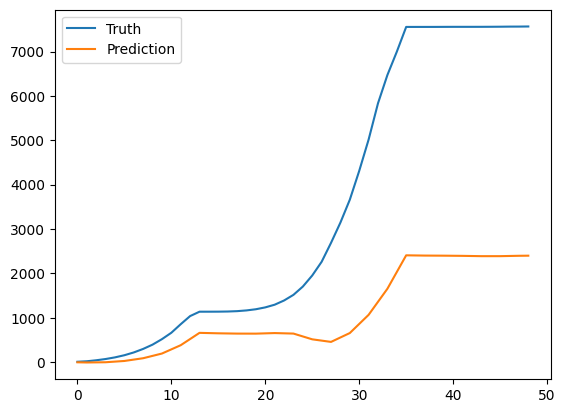

In [115]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum_zero)
plt.legend(['Truth', 'Prediction'])
plt.show()

In [116]:
rmspe_score_cumsum_zero = rmspe(y_test_cumsum, preds_cumsum_zero)
rmspe_score_cumsum_zero

<tf.Tensor: shape=(), dtype=float64, numpy=0.7315514915944361>

In [117]:
mape_score_cumsum_zero = tf.keras.metrics.mean_absolute_percentage_error(y_test_cumsum, preds_cumsum_zero)
mape_score_cumsum_zero

<tf.Tensor: shape=(), dtype=float64, numpy=69.93300943362685>

## Compare

In [118]:
print(rmspe_score, rmspe_score_zero)

tf.Tensor(422.13034, shape=(), dtype=float32) tf.Tensor(147.781352353929, shape=(), dtype=float64)


In [119]:
print(mape_score, mape_score_zero)

tf.Tensor(9243.753, shape=(), dtype=float32) tf.Tensor(3338.52814843176, shape=(), dtype=float64)


In [120]:
print(rmspe_score_cumsum, rmspe_score_cumsum_zero)

tf.Tensor(0.7427744, shape=(), dtype=float32) tf.Tensor(0.7315514915944361, shape=(), dtype=float64)


In [121]:
print(mape_score_cumsum, mape_score_cumsum_zero)

tf.Tensor(70.576324, shape=(), dtype=float32) tf.Tensor(69.93300943362685, shape=(), dtype=float64)


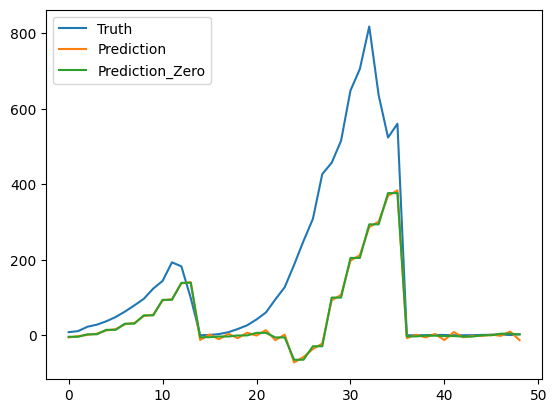

In [122]:
plt.plot(y_test)
plt.plot(preds)
plt.plot(preds_zero)
plt.legend(['Truth', 'Prediction', 'Prediction_Zero'])
plt.show()

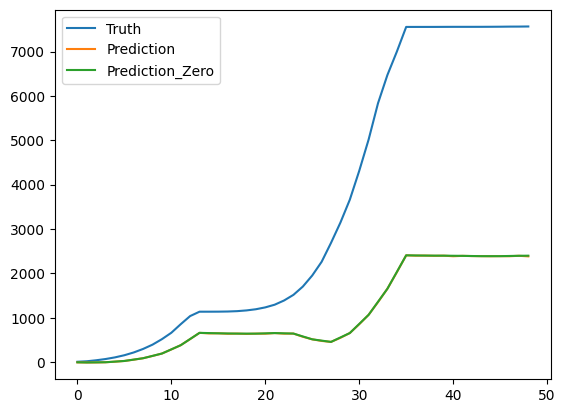

In [123]:
plt.plot(y_test_cumsum)
plt.plot(preds_cumsum)
plt.plot(preds_cumsum_zero)
plt.legend(['Truth', 'Prediction', 'Prediction_Zero'])
plt.show()

# ---------------------------------------------------------------------------------------------------------------------------------------------

In [124]:
model.save('cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf')

NameError: ignored

In [ ]:
!zip -r /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf".zip /content/"cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf"

In [ ]:
loaded_1 = tf.keras.models.load_model("cnn LSTM; LeakyReLU; split 3; find LC from temp and Nf")

In [ ]:
loaded_1.evaluate(X_test, y_test)

# data -> frequency

In [ ]:
def get_wave(data, mode, num_level):
  wave = []
  for i in range(len(data)):
    wave.append(pywt.wavedec([data[i]], mode, level = num_level))
  return np.array(wave).T[0]

In [ ]:
mode = 'haar'

## 1 levels

In [ ]:
num_level = 1

In [ ]:
lc_wave1 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave1

In [ ]:
# Plot cA
plt.plot(lc_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave1[1])
plt.show()

## 2 levels

In [ ]:
num_level = 2

In [ ]:
lc_wave2 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave2

In [ ]:
# Plot cA
plt.plot(lc_wave2[0])
plt.show()

In [ ]:
# Plot cD1
plt.plot(lc_wave2[1])
plt.show()

In [ ]:
# Plot cD2
plt.plot(lc_wave2[2])
plt.show()

## 3 levels

In [ ]:
num_level = 3

In [ ]:
lc_wave3 = get_wave(lc, mode, num_level)

In [ ]:
lc_wave3

In [ ]:
# Plot cA
plt.plot(lc_wave3[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(lc_wave3[1])
plt.show()

In [ ]:
plt.plot(lc_wave1[0])
plt.plot(lc_wave2[0])
plt.plot(lc_wave3[0])
plt.legend(['A1', 'A2', 'A3'])
plt.show()

# **Temperature**

# data -> frequency

## level 1

In [ ]:
num_level = 1

In [ ]:
temp_wave1 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave1

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave1[1])
plt.show()

## level 2

In [ ]:
num_level = 2

In [ ]:
temp_wave2 = get_wave(temp_new, mode, num_level)

In [ ]:
temp_wave2

In [ ]:
# Plot cA
plt.plot(temp_wave2[0])
plt.show()

In [ ]:
# Plot cD
plt.plot(temp_wave2[1])
plt.show()

In [ ]:
# Plot cA
plt.plot(temp_wave1[0])
plt.plot(temp_wave2[0])
plt.show()